/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 8 59 61 63 68 71] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


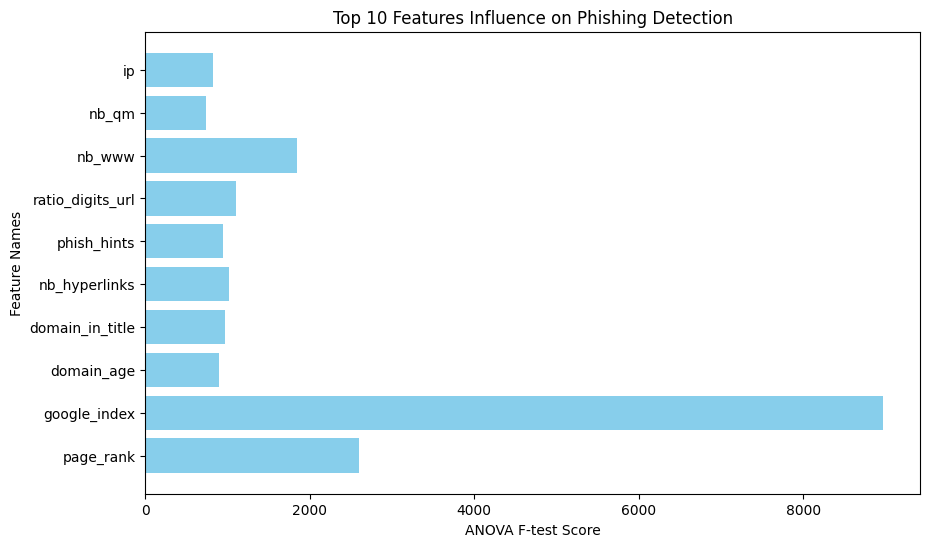

Preprocessing complete. Saved as 'preprocessed_dataset.csv'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif

def preprocess_and_visualize(file_path, target_column, url_column, k=10):
    # Load dataset
    df = pd.read_csv(file_path)

    # Drop the URL column
    df = df.drop(columns=[url_column])

    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Select top k features using ANOVA F-test
    selector = SelectKBest(score_func=f_classif, k=k)
    X_new = selector.fit_transform(X, y)

    # Get selected feature names and scores
    selected_features = X.columns[selector.get_support()]
    feature_scores = selector.scores_[selector.get_support()]

    # Create a new DataFrame with selected features
    df_selected = pd.DataFrame(X_new, columns=selected_features)
    df_selected[target_column] = y.values  # Add target column back

    # Normalize the selected features
    scaler = MinMaxScaler()
    df_selected[selected_features] = scaler.fit_transform(df_selected[selected_features])

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(selected_features, feature_scores, color='skyblue')
    plt.xlabel("ANOVA F-test Score")
    plt.ylabel("Feature Names")
    plt.title("Top 10 Features Influence on Phishing Detection")
    plt.gca().invert_yaxis()  # Highest score on top
    plt.show()

    return df_selected

# Example usage
file_path = "/content/Training.csv"
target_column = "status"  # Change to your target column name
url_column = "url"  # Change to your actual URL column name

preprocessed_df = preprocess_and_visualize(file_path, target_column, url_column)

# Save the preprocessed dataset
preprocessed_df.to_csv("preprocessed_dataset.csv", index=False)
print("Preprocessing complete. Saved as 'preprocessed_dataset.csv'.")


In [ ]:
import pandas as pd
import numpy as np

# ... (previous code for preprocessing and visualization) ...

# Load your dataset
df = pd.read_csv("preprocessed_dataset.csv")  # Or your original CSV file

### 🟢 Step 1: Handle NaN Values

# Drop rows where the label is NaN
df = df.dropna(subset=['status'])

# Fill NaN in numerical columns with median
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill NaN in categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

print("✅ NaN values handled successfully!")

### 🟢 Step 2: Save the cleaned dataset

df.to_csv("cleaned_dataset.csv", index=False)
print("✅ Cleaned dataset saved as 'cleaned_dataset.csv'")

✅ NaN values handled successfully!
✅ Cleaned dataset saved as 'cleaned_dataset.csv'



Class Distribution:
legitimate: 3829 samples (50.00%)
phishing: 3829 samples (50.00%)


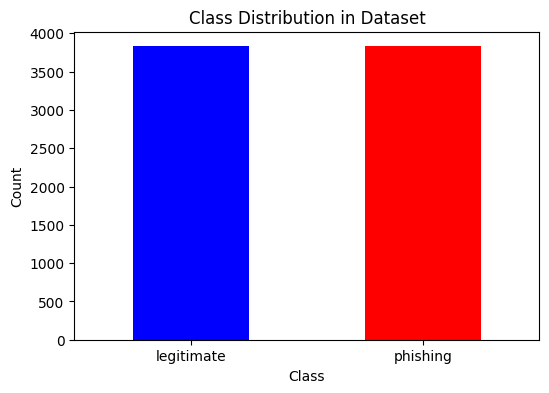

In [ ]:
df=pd.read_csv("/content/cleaned_dataset.csv")
df.head()

### 🔴 Step 2: Check Class Imbalance

# Count occurrences of each class
class_counts = df['status'].value_counts()
total_samples = len(df)

# Print class distribution with percentages
print("\nClass Distribution:")
for label, count in class_counts.items():
    percentage = (count / total_samples) * 100
    print(f"{label}: {count} samples ({percentage:.2f}%)")

# 🔥 Plot Class Distribution
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['blue', 'red'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution in Dataset")
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Ensure all status values are lowercase & stripped of spaces
df['status'] = df['status'].str.strip().str.lower()

# Define label mapping
label_map = {"legitimate": 0, "phishing": 1}

# Apply mapping to change labels
df['label'] = df['status'].map(label_map)

# Check if any NaN values exist after mapping
if df['label'].isna().sum() > 0:
    print("\n⚠️ Warning: Some rows have unmapped values!")
    print(df['status'].unique())  # Print unique values to debug

# Drop rows where label mapping failed (if necessary)
df = df.dropna(subset=['label'])

# Convert label column to integer type
df['label'] = df['label'].astype(int)

# 🚀 Drop the "status" column as it's no longer needed
df = df.drop(columns=['status'])

print("\n✅ Final class labels changed successfully!")

# Verify the class distribution after changes
print("\nUpdated Class Distribution:")
print(df['label'].value_counts())

# Save the updated dataset
df.to_csv("updated_dataset.csv", index=False)
print("\n✅ Updated dataset saved as 'updated_dataset.csv'")



✅ Final class labels changed successfully!

Updated Class Distribution:
label
0    3829
1    3829
Name: count, dtype: int64

✅ Updated dataset saved as 'updated_dataset.csv'
